In [182]:
#Script to compare against price human DRGs and cultured DRGs
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import tpms and pain genes
mean_tpm_iPSC = pd.read_csv(".../tpm_all.csv", delimiter = ",")
mean_tpm_DRG = pd.read_excel(".../pain_genes.xlsx", sheet_name = "Sheet 1", skiprows =3)

In [183]:

# preprocessing the Data, setting index 
mean_tpm_DRG = mean_tpm_DRG.iloc[3:,:]
mean_tpm_DRG_index = mean_tpm_DRG.set_index("ensembl gene name")
mean_tpm_DRG_index = mean_tpm_DRG_index.iloc[:,11:-1].drop("Consistently detectable in acutely dissociated DRGs ?", axis = 1)

In [205]:
# merging the tables of consensus genes between price and zeidler
mean_tpm_ipsc_index = mean_tpm_iPSC.set_index("gene_name")
gesamt_dataframe = pd.merge(mean_tpm_DRG_index, mean_tpm_ipsc_index, how = "inner", left_index = True, right_index = True)

In [206]:
#check the table
gesamt_dataframe.max()

hDIV4-1F      11882.200000
hDIV4-1Fre    12727.200000
hDIV4-2F      14661.600000
hDIV4-3M      11215.400000
hDIV4-4M      12465.600000
                  ...     
840 D26_2      9527.965553
840 D26_3      7868.825038
840 D36_1      7283.878090
840 D36_2      7559.663973
840 D36_3      8335.735175
Length: 68, dtype: float64

In [208]:
only consider tpms above 0.5 in cultured
gesamt_dataframe = gesamt_dataframe[gesamt_dataframe["hDIV4-3M"] > 0.5]
gesamt_dataframe = gesamt_dataframe.transform(lambda x: np.log2(x))
#gesamt_dataframe.to_csv("tpm_adjusted_R.csv")

In [209]:
gesamt_dataframe.max()

hDIV4-1F      13.536514
hDIV4-1Fre    13.635627
hDIV4-2F      13.839755
hDIV4-3M      13.453193
hDIV4-4M      13.605665
                ...    
840 D26_2     13.217952
840 D26_3     12.941933
840 D36_1     12.830491
840 D36_2     12.884106
840 D36_3     13.025094
Length: 68, dtype: float64

In [214]:
# make correlation analysis using spearman correlation
import numpy as np
gesamt_corr = gesamt_dataframe.corr(method = "spearman")
gesamt_corr = gesamt_corr.iloc[:14,15:]
gesamt_corr

,AD3 D0_2,AD3 D0_3,AD3 D5_1,AD3 D5_2,AD3 D5_3,AD3 D9_1,AD3 D9_2,AD3 D9_3,AD3 D16_1,AD3 D16_2,...,840 D9_3,840 D16_1,840 D16_2,840 D16_3,840 D26_1,840 D26_2,840 D26_3,840 D36_1,840 D36_2,840 D36_3
hDIV4-1F,0.553575,0.555316,0.547191,0.545927,0.550237,0.535449,0.534430,0.534320,0.549485,0.542758,...,0.524850,0.535156,0.541798,0.542851,0.542555,0.546373,0.543372,0.527156,0.523802,0.525542
hDIV4-1Fre,0.551950,0.554047,0.551745,0.552138,0.556317,0.540825,0.538806,0.540142,0.552850,0.546064,...,0.527211,0.537401,0.545635,0.544332,0.545242,0.547265,0.546276,0.527653,0.524454,0.525107
hDIV4-2F,0.561029,0.562092,0.558101,0.558199,0.561465,0.557563,0.555110,0.558006,0.604775,0.600190,...,0.548560,0.586182,0.591555,0.593300,0.605664,0.604149,0.607889,0.595926,0.594486,0.588023
hDIV4-3M,0.573805,0.574637,0.572261,0.571438,0.575788,0.565082,0.565366,0.565059,0.601777,0.597095,...,0.556971,0.585035,0.588104,0.590573,0.609174,0.606929,0.610213,0.595229,0.593015,0.586712
hDIV4-4M,0.555614,0.557241,0.551864,0.553515,0.557241,0.550734,0.551034,0.550711,0.594493,0.590065,...,0.540670,0.575698,0.581968,0.581006,0.604920,0.602288,0.606887,0.595264,0.592687,0.584401
hDIV4-5F,0.535147,0.538729,0.527180,0.522879,0.525334,0.526248,0.525632,0.525868,0.578214,0.576899,...,0.524241,0.564225,0.565361,0.574031,0.601176,0.602957,0.600571,0.586307,0.587451,0.583856
hDIV4-6M,0.551163,0.552484,0.549851,0.548576,0.552952,0.545293,0.543420,0.544598,0.592098,0.588155,...,0.536138,0.574351,0.577796,0.580355,0.601390,0.598420,0.603771,0.590049,0.588484,0.580219
hDRG-1F,0.389696,0.389150,0.388223,0.386816,0.384859,0.403987,0.405110,0.404676,0.479302,0.482585,...,0.409404,0.475625,0.469999,0.479206,0.518382,0.512009,0.520066,0.526916,0.530209,0.525485
hDRG-1Fre,0.396138,0.395924,0.395472,0.397553,0.396512,0.413979,0.414242,0.415346,0.485552,0.486121,...,0.414627,0.478896,0.475731,0.479858,0.518727,0.510611,0.521299,0.530760,0.530980,0.525055
hDRG-2F,0.410106,0.408592,0.405721,0.406986,0.405315,0.424348,0.424607,0.424898,0.500434,0.500628,...,0.425615,0.492141,0.490666,0.494767,0.535164,0.528939,0.537408,0.546848,0.548284,0.542017


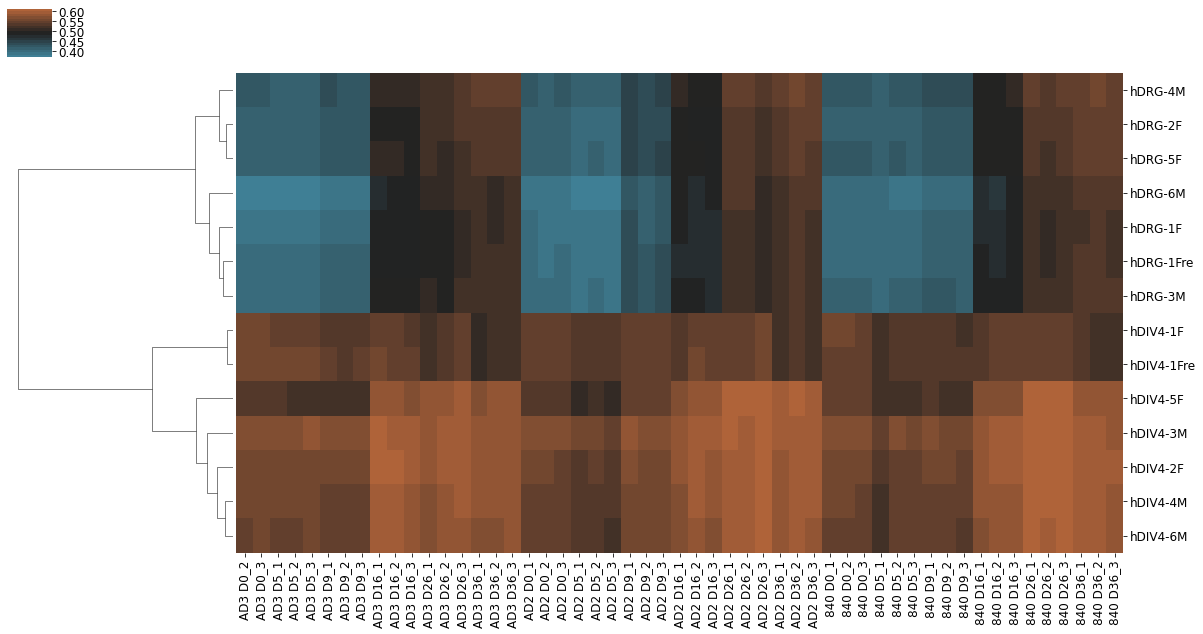

In [215]:
#draw and save the heatmap
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
sns.clustermap(gesamt_corr,cmap = sns.diverging_palette(222, 30, l=50, n=20, center="dark"), col_cluster = False, figsize = (20,10))
#lt.savefig("Clustermap_ted_price_samples.svg", quality = 90, transparent = True, dpi = 500)